In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

from sklearn import linear_model

import pickle
%matplotlib inline

In [74]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [75]:
df=pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")

In [76]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# No Data is missing

# EDA

In [77]:
df.shape

(200, 5)

# We have 200 rows and 5 columns in dataset

In [78]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

# We have float type value in all independent variables and sales is our target variable.


# Checking Null values

In [79]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

# There are no NULL values in the dataset, hence it is clean.

In [80]:
df['sales'].unique()

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. ,  5.6,
       15.5, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,  9.5, 12.8,
       25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7,  8.5, 14.9, 23.2, 14.8,
       11.4, 10.7, 22.6, 21.2, 20.2, 23.7,  5.5, 23.8, 18.4,  8.1, 24.2,
       15.7, 14. , 13.4, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 12.3, 13.6, 21.7, 15.2, 16. , 16.7, 11.2,  7.3, 19.4,
       22.2, 11.5, 16.9, 11.7, 17.2, 19.2, 19.8, 21.8, 14.1, 12.6, 12.2,
        9.4,  6.6,  7. , 11.6, 19.7, 24.7,  1.6, 12.7,  5.7, 19.6, 10.8,
       20.8, 10.9, 20.1, 10.3, 16.1, 15.6,  3.2, 15.3, 14.4, 13.3,  8. ,
        8.4, 14.5,  7.6, 27. , 26.2, 17.6, 17.3,  6.7,  9.9,  5.9, 25.5])

In [81]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


# from the above table we get the count,mean,std,min,max of our target variable.

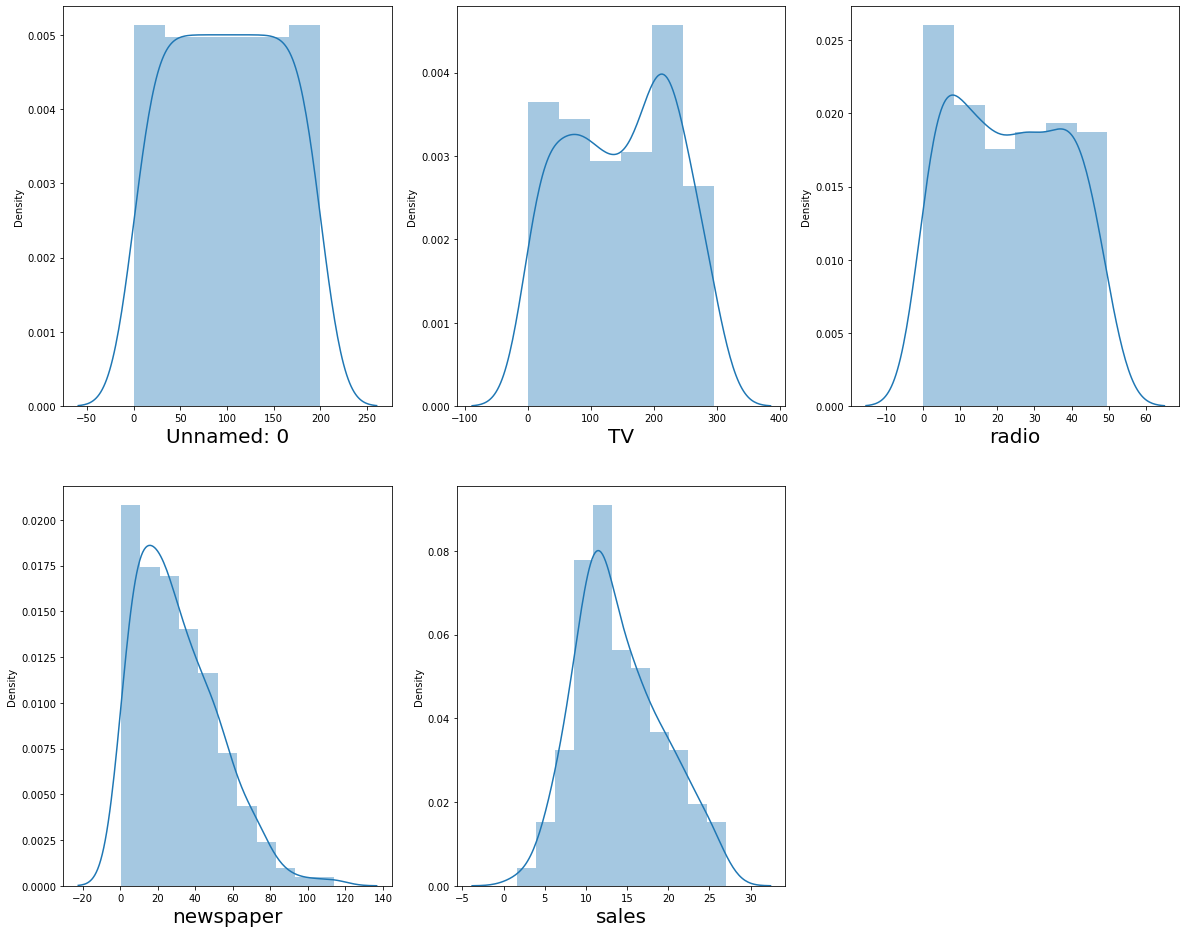

In [82]:
#Lets see how the data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1


for column in df:
    if plotnumber<=8: # asthere are 8 columns in the dataset.
        ax = plt.subplot(3,3, plotnumber)
        sn.distplot(df[column])
        plt.xlabel(column, fontsize=20)
        
    
    plotnumber+=1
plt.show()

# Outlier Analysis

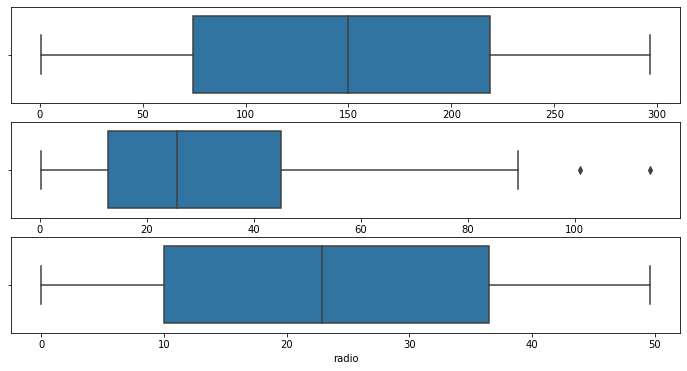

In [83]:
fig, axs = plt.subplots(3, figsize = (12,6))
sn.boxplot(df['TV'], ax = axs[0])
sn.boxplot(df['newspaper'], ax = axs[1])
sn.boxplot(df['radio'], ax = axs[2])
plt.show()     

# There are no considerable outliers present in the data.

In [84]:
from scipy.stats import zscore

z=np.abs(zscore(df))

new_df=df [(z<3).all(axis=1) ]

In [85]:
new_df.shape

(198, 5)

# after removing outlier we lost 2 rows.

In [86]:
df.shape

(200, 5)

before removing outliers we had (200rows, 5columns) after removing we have 198 rows and 5 columns

# to calculate percentage (198/200) = 0.099
the data loss is less than 1%, so it is completely fine.

# To check Skewness

In [87]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

Acceptable rangle for skewness value is +0.5 to -0.5.

Outside of this range is highly skew.


# Univariate Analysis

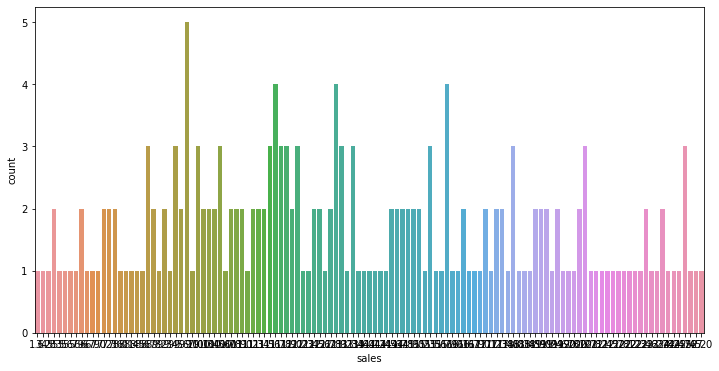

In [88]:
plt.figure(figsize=(12,6))
sn.countplot(df['sales'])
plt.show()

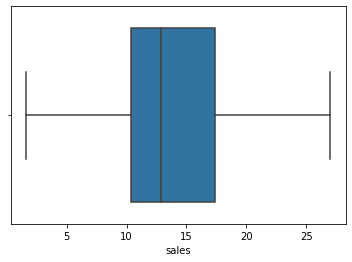

In [89]:
sn.boxplot(df['sales'])
plt.show()

# Bivariate analysis,

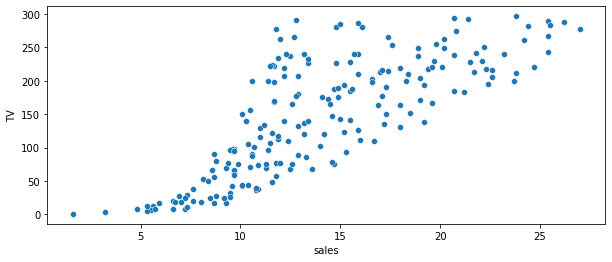

In [90]:
#comparison between sales and TV, scatter plot
plt.figure(figsize=(10,4))
sn.scatterplot(x ='sales', y ='TV', data = df, palette = "inferno")
plt.show()

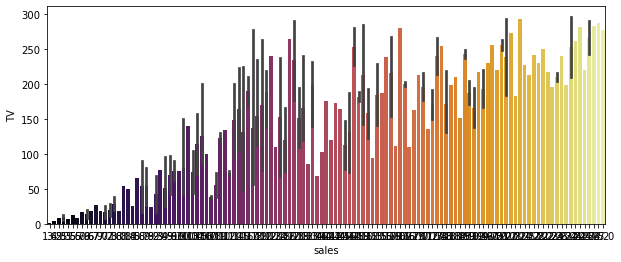

In [91]:
plt.figure(figsize=(10,4))
sn.barplot(x ='sales', y ='TV', data = df, palette = "inferno")
plt.show()

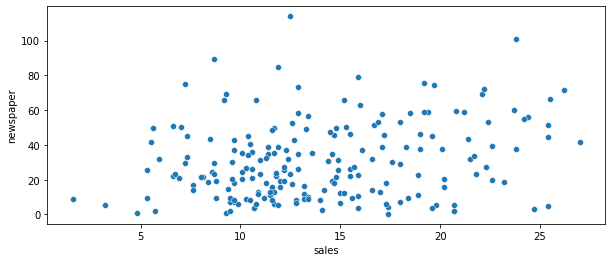

In [92]:
#comparison between sales and newspaper, scatter plot
plt.figure(figsize=(10,4))
sn.scatterplot(x ='sales', y ='newspaper', data = df, palette = "inferno")
plt.show()

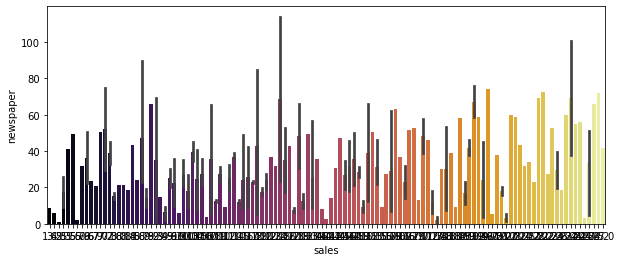

In [93]:
plt.figure(figsize=(10,4))
sn.barplot(x ='sales', y ='newspaper', data = df, palette = "inferno")
plt.show()

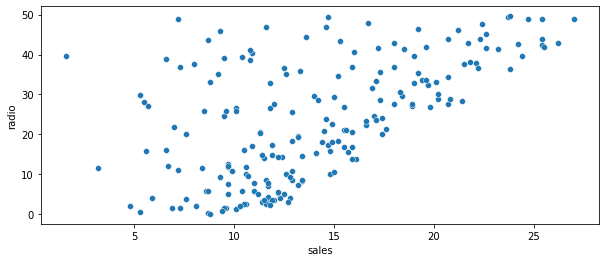

In [94]:
#comparison between sales and radio, scatter plot
plt.figure(figsize=(10,4))
sn.scatterplot(x ='sales', y ='radio', data = df, palette = "inferno")
plt.show()

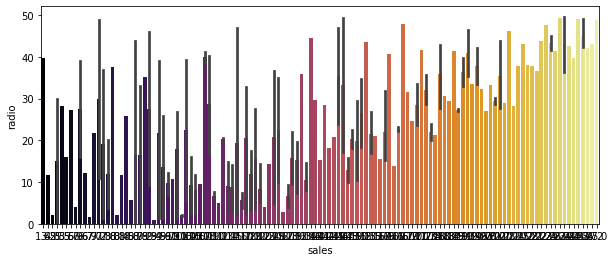

In [95]:
plt.figure(figsize=(10,4))
sn.barplot(x ='sales', y ='radio', data = df, palette = "inferno")
plt.show()

# Multi-variate analysis

<Figure size 576x288 with 0 Axes>

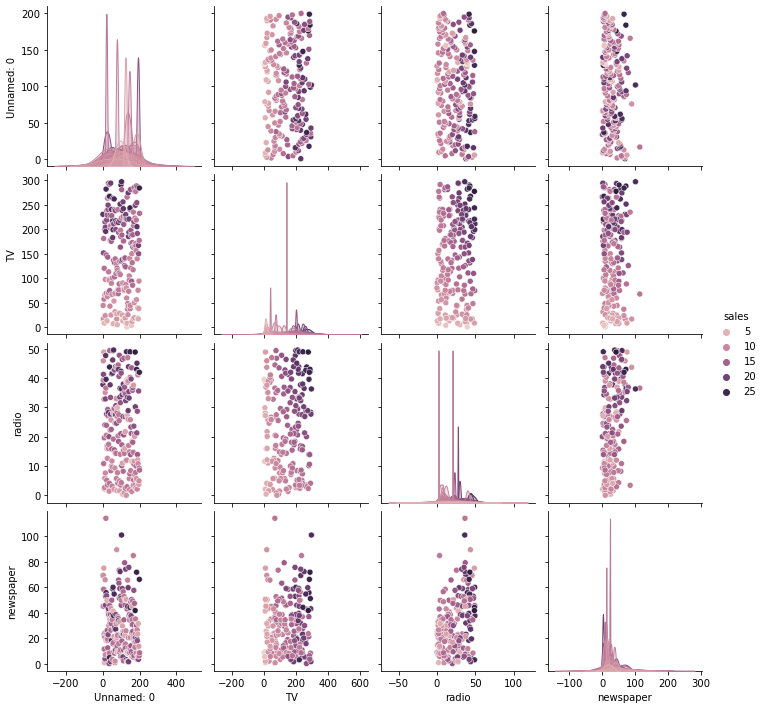

In [96]:
plt.figure(figsize=(8,4))
sn.pairplot(df,hue="sales")
plt.show()

from the above plots, we check the relationship between sales(dependent variable) and other feature(independent variable).

we are creating a heatmap, to find which other features are having a good relationship with our target variable that is sales.

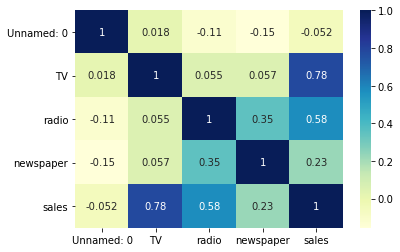

In [97]:
# Let's see the correlation between different variables.
sn.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

# we can see that from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales. 
So let's go ahead and perform simple linear regression using TV as our feature variable.

# Data Preprocessing

performing Simple Linear Regression
Equation of linear regression
y=c+m1x1+m2x2+...+mnxn 
y  is the response(target variable)
c  is the intercept
m1  is the coefficient for the first feature
mn  is the coefficient for the nth feature
In our case:

y=c+m1×TV 
The  m  values are called the model coefficients or model parameters.


We first assign the feature variable, TV, in this case, to the variable X and the response variable, Sales, to the variable y.

In [608]:
X = df['TV']
y = df['sales']  

In [173]:
X.value_counts()

TV   
17.2     2
199.8    2
184.9    2
177.0    2
76.4     2
        ..
195.4    1
193.7    1
193.2    1
191.1    1
0.7      1
Length: 190, dtype: int64

In [174]:
y.value_counts()

9.7     5
12.9    4
11.7    4
15.9    4
25.4    3
       ..
15.7    1
14.2    1
11.2    1
19.4    1
18.5    1
Name: sales, Length: 121, dtype: int64

In [175]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [176]:
y_train.head()

74     17.0
3      18.5
185    22.6
26     15.0
90     11.2
Name: sales, dtype: float64

In [609]:
from sklearn.model_selection import train_test_split

In [610]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [611]:
# create X and y
feature_cols = ['TV']
X = df[feature_cols]
y = df.sales

#follow the usual sklearn pattern : import, instantiate,fit

from sklearn.linear_model import LinearRegression

lm = LinearRegression()

#Model is getting trained
lm.fit(X,y)

# Model is ready for the prediction
lm.predict(X_new)


array([9.40942557])

In [165]:
lm.coef_  #m value

array([0.04753664])

In [166]:
lm.intercept_   #b value

7.032593549127694

In [167]:
# y=m*x+b

0.04753664*X_new+7.032593549127694

,TV
0,9.409426


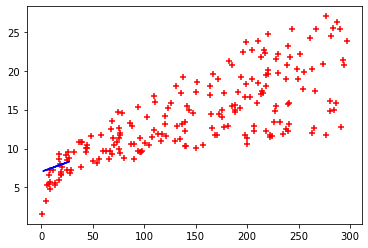

In [236]:
%matplotlib inline
plt.scatter(df.TV,df.sales,color='red',marker='+')
plt.plot(df.sales,lm.predict(df[['sales']]),color='blue')

In [199]:
from sklearn.metrics import r2_score
R2sq = r2_score(y_test, y_pred)
R2sq

0.59429872677833

In [169]:
output = lm.predict([[230.1]])
output

array([17.97077451])

In [216]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
MSE

7.975798532854855

In [171]:
import math
rmse = math.sqrt(MSE)
rmse 

2.8241456288327016

In [275]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

0.4192264713258088

In [191]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
MAE

2.161984932672073

In [204]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(y_test, y_pred)
MAPE

0.1487587493164713

In [193]:
from sklearn.metrics import mean_squared_log_error
MSLE = mean_squared_log_error(y_test, y_pred)
MSLE

0.029429324426775386

In [201]:
from sklearn.metrics import max_error
Maxerror = max_error(y_test, y_pred)
Maxerror

7.466966010433495

In [203]:
from sklearn.metrics import explained_variance_score
EVS = explained_variance_score(y_test, y_pred)
EVS

0.6159546484293528

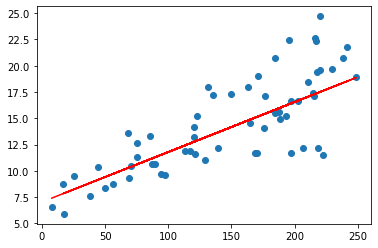

In [184]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 7.032593549127694 + 0.04753664*X_test, 'r')  # y=m*x+b (0.04753664*X_new+7.032593549127694)
plt.show()

# MultiLinear Regression

In [613]:
X=new_df.drop("sales",axis=1)
y=new_df["sales"]

In [614]:
# fitting our dataset to Training and Testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state =42)

In [359]:
# Fitting Linear Regression to the Training dataset
from sklearn.linear_model import LinearRegression
multiple_reg = LinearRegression()
multiple_reg.fit(X_train, y_train)

LinearRegression()

In [348]:
# predicting the Test set result
y_pred = multiple_reg.predict(X_test)

In [349]:
# calculating the coefficients
multiple_reg.coef_    #m1, m2 , m3 value

array([-0.00033861,  0.04524386,  0.18231499,  0.00494041])

In [350]:
# calculating the Intercept
multiple_reg.intercept_ #b value 0.04753664*X_new+7.032593549127694

3.0165238115646353

In [360]:
# Calculating the R squared value
from sklearn.metrics import r2_score
R2sq = r2_score(y_test, y_pred)
R2sq

0.8990848341790881

# Finding the best Model

# Fitting Random Forest Regression to the dataset

In [477]:
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create regressor object
RF = RandomForestRegressor(n_estimators = 100, random_state = 0)

# fit the regressor with x and y data
RF.fit(X, y)


RandomForestRegressor(random_state=0)

In [478]:
y_pred = RF.predict(X_test)

In [479]:
from sklearn import metrics
y_pred = RF.predict(X_test)
R2sq = metrics.r2_score(y_test, y_pred)
R2sq

0.9974905928894557

In [480]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
MSE

0.06806290000000154

In [481]:
import math
rmse = math.sqrt(MSE)
rmse 

0.260888673575534

In [482]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
MAE

0.20355000000000426

In [483]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(y_test, y_pred)
MAPE

0.01729733791548053

In [484]:
from sklearn.metrics import mean_squared_log_error
MSLE = mean_squared_log_error(y_test, y_pred)
MSLE

0.0005196464412683446

In [485]:
from sklearn.metrics import max_error
Maxerror = max_error(y_test, y_pred)
Maxerror

0.666000000000003

In [486]:
from sklearn.metrics import explained_variance_score
EVS = explained_variance_score(y_test, y_pred)
EVS

0.9974952177295368

# R-Square associated with Random Forest Regression is : 0.99749 ie., 99%
 mean squared error = 0.068062 ;      rmse = 0.26088   ;         mean absolute error =  0.2035  ;                                mean absolute percentage error = 0.0172       ;    mean squared log error = 0.0005196      ;
 max error = 0.666     ;          explained_variance_score = 0.997

# Fitting SVC to the dataset

In [487]:
from sklearn.svm import SVR
SV = SVR(kernel = 'rbf')
SV.fit(X, y)

SVR()

In [488]:
y_pred = SV.predict(X_test)

In [489]:
from sklearn import metrics
y_pred = SV.predict(X_test)
R2sq = metrics.r2_score(y_test, y_pred)
R2sq

0.8205760753985374

In [490]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
MSE

4.8665330493579315

In [491]:
import math
rmse = math.sqrt(MSE)
rmse 

2.2060219965716414

In [492]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
MAE

1.6030029813090672

In [493]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(y_test, y_pred)
MAPE

0.12177898424812876

In [494]:
from sklearn.metrics import mean_squared_log_error
MSLE = mean_squared_log_error(y_test, y_pred)
MSLE

0.019529887396153633

In [495]:
from sklearn.metrics import max_error
Maxerror = max_error(y_test, y_pred)
Maxerror

5.565720307089986

In [496]:
from sklearn.metrics import explained_variance_score
EVS = explained_variance_score(y_test, y_pred)
EVS

0.8213040278165318

# R-Square associated with SV Regression is : 0.82057607 ie., 82%
 mean squared error = 4.8665 ;      rmse = 2.206   ;         mean absolute error =  1.603  ;                                mean absolute percentage error = 0.121       ;    mean squared log error = 0.01952     ;
 max error = 5.565     ;          explained_variance_score = 0.82130

# Fitting Decision Tree Regression to the dataset

In [497]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(X, y)

DecisionTreeRegressor()

In [498]:
y_pred = DTR.predict(X_test)

In [499]:
from sklearn import metrics
y_pred = DTR.predict(X_test)
R2sq = metrics.r2_score(y_test, y_pred)
R2sq

1.0

In [500]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
MSE

0.0

In [501]:
import math
rmse = math.sqrt(MSE)
rmse 

0.0

In [502]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
MAE

0.0

In [503]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(y_test, y_pred)
MAPE

0.0

In [504]:
from sklearn.metrics import mean_squared_log_error
MSLE = mean_squared_log_error(y_test, y_pred)
MSLE

0.0

In [505]:
from sklearn.metrics import max_error
Maxerror = max_error(y_test, y_pred)
Maxerror

0.0

In [506]:
from sklearn.metrics import explained_variance_score
EVS = explained_variance_score(y_test, y_pred)
EVS

1.0

# R-Square associated with Decision Tree Regression is : 1.0 ie., 100%
 mean squared error = 0.0 ;      rmse = 0.0   ;         mean absolute error =  0.0  ;                       
 mean absolute percentage error = 0.0      ;    mean squared log error = 0.0     ;
 max error = 0.0     ;          explained_variance_score = 1.0


# hence the Decision Tree Regression is the best model

# Hyperparameter tuning

In [514]:
from sklearn.model_selection import GridSearchCV

param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}



In [560]:
rfr = RandomForestRegressor(random_state = 1)

grid = GridSearchCV(estimator = rfr, param_grid = param_grid, 

                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)



In [564]:
grid.fit(X_train, y_train);

print(grid.best_params_)

{'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 15}


In [566]:
print(grid.score(X_test, y_test))

0.9777041861494875


In [596]:
Final_mod = LinearRegression()
Final_mod.fit(X_train, y_train)

LinearRegression()

# Saving the model

In [597]:
import joblib
joblib.dump(Final_mod,"FinalModel.pkl")

['FinalModel.pkl']

# Loading the model

In [598]:
mod=joblib.load("FinalModel.pkl")

In [600]:
print(mod.predict(X_test))

[ 8.91483595 12.00843015 23.23739944  8.90941668 10.44276698 21.88930887
 19.18447237 11.47670059 14.12586222 17.78594641 14.21814473 20.80952893
  8.65508715 12.74155656  6.65216833  9.04027421 10.66845976 12.63161657
  9.79363145 11.53187971 13.0164427  17.10411295 22.87284086  6.1198643
 17.19583565 20.93969693  8.03102937 14.60881672  6.88083199 12.25271484
 17.77056731 13.70812812  6.64719058 14.37165591 15.63677112 18.17252367
 15.28623319 11.93434471 18.20461504 16.22299574]
